# **Workshop 2: Signal Analysis in Frequency Domain**

In [2]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

## 2.1 Fourier Series Approximation

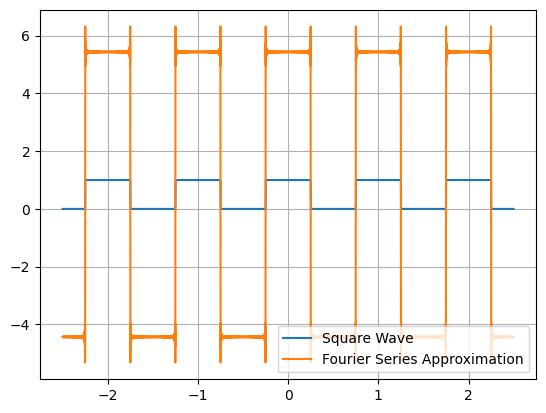

In [12]:
# Square pulse
def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s = 1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s = 0
    return s


# Fourier series coefficients
def a(k):
    if k == 0:
        a_k = 1/2
    else:
        a_k = np.sin(k*np.pi/2)/k*np.pi
    return a_k


def fs_approx(t, N):
    x_t = 0
    for k in range(-N, N+1):
        if k == 0 or k%2 == 1:
            a_k = a(k)
            omega = np.pi*2
            x_t += a_k * np.exp(1j * k * omega * t)
    return x_t.real
# Fourier series approximation of the square wave
x = []
y = []
N = 500 # CHANGE HERE
time = np.arange(-2.5,2.5,0.001)
for t in time:
    x.append(square(t))
    y.append(fs_approx(t,N).real)


fig, ax = plt.subplots()
ax.plot(time, x, label='Square Wave')
ax.plot(time, y, label='Fourier Series Approximation')
ax.grid(True)
ax.legend()
plt.show()

## **2.2 Fourier Series Coefficients**